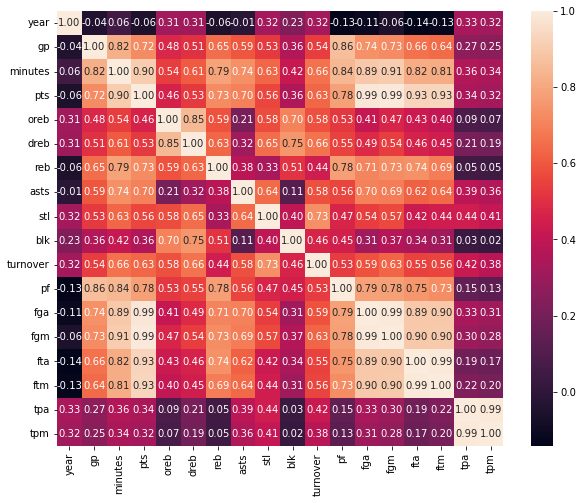

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd

csv_file_path = '/Users/Pashlene/Desktop/Modified_player_regular_season.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()
correlation_matrix =df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


# Selecting the performance metrics columns for the Isolation Forest
#try to add more advanced metrics
performance_metrics = ['pts', 'oreb', 'dreb', 'asts', 'stl', 'blk']

# We will handle missing values by filling them with the median of the column
df_filled = df[performance_metrics].fillna(0)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(df_filled)

# Predict anomalies (the lower, the more anomalous)
scores = iso_forest.decision_function(df_filled)

# Add the scores to the original DataFrame to identify the players
df['anomaly_score'] = scores

In [2]:
# We will group the data by year and find the most outstanding player for each season based on the anomaly score
best_outstanding_player_each_season = df[df['year'].between(1946, 2004)].groupby('year').apply(lambda x: x.nsmallest(1, 'anomaly_score'))

# We are interested in the year, player's name, team, and their anomaly score
best_outstanding_players_season = best_outstanding_player_each_season[['ilkid', 'year', 'firstname', 'lastname', 'team', 'anomaly_score']].reset_index(drop=True)
best_outstanding_players_season


# We can even find the top 5,10 etc outstanding players per season
# We can find the outstanding players amongst the best players per season
# we can use another ML technique for the above to comlply with the aim of the project

,ilkid,year,firstname,lastname,team,anomaly_score
0,FULKSJO01,1946,Joe,Fulks,PH1,0.088211
1,ZASLOMA01,1947,Max,Zaslofsky,CH1,0.126246
2,MIKANGE01,1948,George,Mikan,MIE,0.071639
3,MIKANGE01,1949,George,Mikan,MIE,0.053361
4,MIKANGE01,1950,George,Mikan,MIE,0.048602
5,PHILLAN01,1951,Andy,Phillip,PH1,0.025072
6,COUSYBO01,1952,Bob,Cousy,BOS,-0.004354
7,COUSYBO01,1953,Bob,Cousy,BOS,0.006621
8,COUSYBO01,1954,Bob,Cousy,BOS,-0.011376
9,COUSYBO01,1955,Bob,Cousy,BOS,-0.019421
